In [19]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore
from rdkit.Chem import rdmolfiles


def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [20]:
parquet = "./charge_models_no_riniker_2.parquet"
df = pd.read_parquet(parquet)
df

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.4049628140674173, 0.14432636053253614, 0.1...","[-0.0288000606060606, -0.18090006060606062, 0....","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.706, 0.2087, 0.1506, -0.3581, -0.0413, -0....",4.730896,4.856963,4.670946,6.269484,NaN,...,"[0.018815215526470988, 0.018345010783864992, 0...",NaN,NaN,"[0.018448609456786613, 0.01820817830002497, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.13172798348494, -0.7071067813469041, -0.2...","[-5.018616314203731, 0.4632425171600322, 0.100...",5,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.350159
1,"[-0.4037704770262108, 0.14156304512088946, 0.1...","[-0.03264854545454547, -0.17574854545454546, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.3724, 0.156, 0.268, -0.536, 0.123, -0.416,...",4.226850,4.326920,4.186477,7.197369,NaN,...,"[-0.04516719393616425, -0.04482597858014744, -...",NaN,NaN,"[-0.04206013809254472, -0.041903892848132784, ...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.838834764831843, -1.7677669529663687, -2....","[4.484300138243575, 0.35318331849637646, -1.28...",3,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351913
2,"[-0.40505937617927246, 0.14217284107975822, 0....","[-0.03586060606060607, -0.17896060606060607, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.4323, 0.2093, 0.1895, -0.5538, 0.1625, -0....",3.577225,3.826449,3.734178,6.274385,NaN,...,"[0.030029996676327022, 0.022934726808625225, 0...",NaN,NaN,"[0.030853001105334954, 0.02325668785908519, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.8388347649922, -0.7071067816676175, 0.105...","[-4.3428902773538, 0.32350710654565373, 1.5659...",1,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.349073
3,"[-0.4094433697455668, 0.1478973259577606, 0.15...","[-0.0288303333333333, -0.1779303333333333, 0.2...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6885, 0.2564, 0.1417, -0.4687, 0.0818, -0....",4.397994,4.498523,4.359614,6.541107,NaN,...,"[0.014302161016454784, 0.013676902607081265, 0...",NaN,NaN,"[0.014605143404105903, 0.014216900660915854, 0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174592570952, -1.0606601716194646, -0....","[-4.3430294101006, -1.0839230894545173, -0.765...",2,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351719
4,"[-0.4081850001105134, 0.14921126934025616, 0.1...","[-0.029860666666666678, -0.17696066666666668, ...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6375, 0.2134, 0.288, -0.5415, 0.1128, -0.4...",3.780919,3.859773,3.671967,6.493866,NaN,...,"[0.017789256276210256, 0.023219617504266127, 0...",NaN,NaN,"[0.018580753077895196, 0.0246329030342487, 0.0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174593212378, -0.35355339091398713, -0...","[-4.146999114569908, -1.4707830953845562, 1.57...",6,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.352163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"[-0.44000147988059796, 0.33859736523892947, -0...","[-0.05586498245614034, -0.01726498245614034, -...","[-0.10983872936483015, 0.27650585247759235, -0...",None,"[-0.5583, 0.342, -0.5662, 0.1224, 0.0993, -0.4...",3.654122,3.767507,4.061059,2.652702,NaN,...,"[0.09220103840683276, 0.09275196970520054, 0.0...",NaN,NaN,"[0.0934209650979767, 0.0938590895494702, 0.091...",[C:1]([C:2]1=[C:3]([H:32])[c:4]2[c:5]([c:7]([H...,"[[-7.778174592959183, -2.4748737339672395, -1....","[4.876269232336068, 3.997392225685083, 0.79979...",1,[H][C]1=[C]([C]([H])([H])[H])[N]([H])[c]2[c]([...,-1221.404013
351,"[-0.4383900310382283, 0.33852306771309265, -0....","[-0.04988252631578947, -0.043282526315789466, ...","[-0.109838729364

In [21]:
df[df['molecule'] == '[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:24](=[O:25])[O-:26])[N:8]2[C@@:9]([H:32])([C@@:10]([N:13]([C:14](=[O:15])[C:16]([C:17]3=[C:18]([H:37])[C:19]([H:38])=[C:20]([H:39])[S:21]3)([H:35])[H:36])[H:34])([H:33])[C:11]2=[O:12])[S:22][C:23]1([H:40])[H:41])([H:30])[H:31])([H:27])([H:28])[H:29]']

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
106,"[-0.6305107717165819, 0.9830453424642138, -0.6...","[-0.16512441463414634, 0.6600755853658536, -0....","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.5134, 0.8741, -0.6113, -0.4698, 0.1163, -0...",6.718621,7.078699,7.440151,6.892841,NaN,...,"[-0.0480512116238727, -0.04754429346730724, -0...",NaN,NaN,"[-0.05124359569164483, -0.05040587168309507, -...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-8.131727983645206, -2.474873734540241, 0.22...","[3.9529433219118477, -1.2250760922724637, -3.6...",1,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1960.427239
108,"[-0.625123281031182, 0.9943809873637913, -0.69...","[-0.1520999756097561, 0.6311000243902439, -0.5...","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.5573, 0.9299, -0.6503, -0.4037, -0.0003, -...",1.062906,1.061158,2.602896,6.866799,NaN,...,"[-0.04859384689202242, -0.04764044808997828, -...",NaN,NaN,"[-0.04961757028917013, -0.048754580847003126, ...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-9.899494936998865, -2.5873176440812995, 0.3...","[-6.515257457217277, -1.914667448738276, 0.719...",0,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1967.870414
109,"[-0.6328256555616257, 0.9976986448598473, -0.7...","[-0.1960268536585366, 0.6631731463414634, -0.5...","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.3379, 0.6921, -0.6072, -0.2107, -0.0535, 0...",1.728425,1.403394,3.108062,5.507912,NaN,...,"[-0.08389760213249252, -0.08289705098423648, -...",NaN,NaN,"[-0.08151615137334645, -0.0810348254581168, -0...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-8.485281374496706, 1.414213562373099, -1.46...","[-3.562911448909344, 2.827276006367878, -2.292...",3,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1967.865695
118,"[-0.616899227276815, 1.0601153344822365, -0.87...","[-0.1871, 0.6561, -0.796, -0.7619, -0.07340000...","[-0.28419187912581173, 0.7805257712877015, -0....",None,"[-0.6283, 1.1607, -0.8737, -0.9244, -0.3391, -...",5.362841,5.549711,7.348816,6.621911,NaN,...,"[-0.0893514960567985, -0.09058143654344843, -0...",NaN,NaN,"[-0.09007980200325605, -0.09139837018161145, -...",[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:...,"[[-8.83883476457372, 0.707106780928417, -1.457...","[-5.560482805491313, 1.4011695708712393, -1.03...",2,[H][C]1=[C]([H])[C]([H])=[C]([C]([H])([H])[C](...,-1967.849605


In [ ]:

# Your DataFrame is assumed to be named `df`

# Define the three problematic entries
failures = [
    {'molecule': '[C:1]([C:2]([N+:3]([C:4]([C:5](=[O:6])[O-:7])([H:33])[H:34])([C:8]([C:9](=[O:10])[O-:11])([H:35])[H:36])[H:32])([H:30])[H:31])([N+:12]([C:13]([C:14]([N+:15]([C:16]([C:17](=[O:18])[O-:19])([H:43])[H:44])([C:20]([C:21](=[O:22])[O-:23])([H:45])[H:46])[H:42])([H:40])[H:41])([H:38])[H:39])([C:24]([C:25](=[O:26])[O-:27])([H:47])[H:48])[H:37])([H:28])[H:29]',
     'conformer_no': 2},
    {'molecule': '[C:1]([C:2](=[O:3])[O:4][C:5]([C:6]1=[C:7]([C:24](=[O:25])[O-:26])[N:8]2[C@@:9]([H:32])([C@@:10]([N:13]([C:14](=[O:15])[C:16]([C:17]3=[C:18]([H:37])[C:19]([H:38])=[C:20]([H:39])[S:21]3)([H:35])[H:36])[H:34])([H:33])[C:11]2=[O:12])[S:22][C:23]1([H:40])[H:41])([H:30])[H:31])([H:27])([H:28])[H:29]'},
    {'molecule': '[C:1]([C:2]([C:3]([C:4]([C:5]([C@@:6]([C:7]([H:38])([H:39])[H:40])(/[C:8](=[C:9](/[C@:10]1([H:43])[C@@:11]([O:25][H:60])([H:44])[C:12]([H:45])([H:46])[C@@:13]([O:24][H:59])([H:47])[C@@:14]1([C:15]([C:16](=[C:17]([C:18]([C:19]([C:20]([C:21](=[O:22])[O-:23])([H:57])[H:58])([H:55])[H:56])([H:53])[H:54])[H:52])[H:51])([H:49])[H:50])[H:48])[H:42])[H:41])[O:26][H:61])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])([H:30])[H:31])([H:27])([H:28])[H:29]',
     'conformer_no': 6},
    {'molecule': '[C:1]([C:2]([C:3](=[O:4])[N:5]([C@@:6]([C:7]([S:8][H:29])([H:27])[H:28])([C:9](=[O:10])[N:11]([C:12]([C:13](=[O:14])[O-:15])([H:31])[H:32])[H:30])[H:26])[H:25])([H:23])[H:24])([C@@:16]([C:17](=[O:18])[O-:19])([N+:20]([H:34])([H:35])[H:36])[H:33])([H:21])[H:22]',
    'conformer_no': 1},
    {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
     'conformer_no': 1},
    {'molecule': '[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]',
     'conformer_no': 6},
]

# Build a mask to filter them out
mask = pd.Series([True] * len(df))  # Start with all True

for f in failures:
    submask = (df['molecule'] == f['molecule'])
    if 'conformer_no' in f:
        submask &= (df['conformer_no'] == f['conformer_no'])
    mask &= ~submask  # Negate submask to drop the failures

# Apply the mask to get the filtered DataFrame
filtered_df = df[mask]
filtered_df


,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.4049628140674173, 0.14432636053253614, 0.1...","[-0.0288000606060606, -0.18090006060606062, 0....","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.706, 0.2087, 0.1506, -0.3581, -0.0413, -0....",4.730896,4.856963,4.670946,6.269484,NaN,...,"[0.018815215526470988, 0.018345010783864992, 0...",NaN,NaN,"[0.018448609456786613, 0.01820817830002497, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.13172798348494, -0.7071067813469041, -0.2...","[-5.018616314203731, 0.4632425171600322, 0.100...",5,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.350159
1,"[-0.4037704770262108, 0.14156304512088946, 0.1...","[-0.03264854545454547, -0.17574854545454546, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.3724, 0.156, 0.268, -0.536, 0.123, -0.416,...",4.226850,4.326920,4.186477,7.197369,NaN,...,"[-0.04516719393616425, -0.04482597858014744, -...",NaN,NaN,"[-0.04206013809254472, -0.041903892848132784, ...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.838834764831843, -1.7677669529663687, -2....","[4.484300138243575, 0.35318331849637646, -1.28...",3,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351913
2,"[-0.40505937617927246, 0.14217284107975822, 0....","[-0.03586060606060607, -0.17896060606060607, 0...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.4323, 0.2093, 0.1895, -0.5538, 0.1625, -0....",3.577225,3.826449,3.734178,6.274385,NaN,...,"[0.030029996676327022, 0.022934726808625225, 0...",NaN,NaN,"[0.030853001105334954, 0.02325668785908519, 0....",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-8.8388347649922, -0.7071067816676175, 0.105...","[-4.3428902773538, 0.32350710654565373, 1.5659...",1,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.349073
3,"[-0.4094433697455668, 0.1478973259577606, 0.15...","[-0.0288303333333333, -0.1779303333333333, 0.2...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6885, 0.2564, 0.1417, -0.4687, 0.0818, -0....",4.397994,4.498523,4.359614,6.541107,NaN,...,"[0.014302161016454784, 0.013676902607081265, 0...",NaN,NaN,"[0.014605143404105903, 0.014216900660915854, 0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174592570952, -1.0606601716194646, -0....","[-4.3430294101006, -1.0839230894545173, -0.765...",2,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.351719
4,"[-0.4081850001105134, 0.14921126934025616, 0.1...","[-0.029860666666666678, -0.17696066666666668, ...","[-0.12456212802366777, 0.055501231415705246, 0...",None,"[-0.6375, 0.2134, 0.288, -0.5415, 0.1128, -0.4...",3.780919,3.859773,3.671967,6.493866,NaN,...,"[0.017789256276210256, 0.023219617504266127, 0...",NaN,NaN,"[0.018580753077895196, 0.0246329030342487, 0.0...",[C:1]([C:2]1=[C:3]([C:7]([S:8][C:9]([C:10]([N:...,"[[-7.778174593212378, -0.35355339091398713, -0...","[-4.146999114569908, -1.4707830953845562, 1.57...",6,[H][C]1=[N][C]([C]([H])([H])[S][C]([H])([H])[C...,-1112.352163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"[-0.44000147988059796, 0.33859736523892947, -0...","[-0.05586498245614034, -0.01726498245614034, -...","[-0.10983872936483015, 0.27650585247759235, -0...",None,"[-0.5583, 0.342, -0.5662, 0.1224, 0.0993, -0.4...",3.654122,3.767507,4.061059,2.652702,NaN,...,"[0.09220103840683276, 0.09275196970520054, 0.0...",NaN,NaN,"[0.0934209650979767, 0.0938590895494702, 0.091...",[C:1]([C:2]1=[C:3]([H:32])[c:4]2[c:5]([c:7]([H...,"[[-7.778174592959183, -2.4748737339672395, -1....","[4.876269232336068, 3.997392225685083, 0.79979...",1,[H][C]1=[C]([C]([H])([H])[H])[N]([H])[c]2[c]([...,-1221.404013
351,"[-0.4383900310382283, 0.33852306771309265, -0....","[-0.04988252631578947, -0.043282526315789466, ...","[-0.109838729364

In [23]:
df = filtered_df

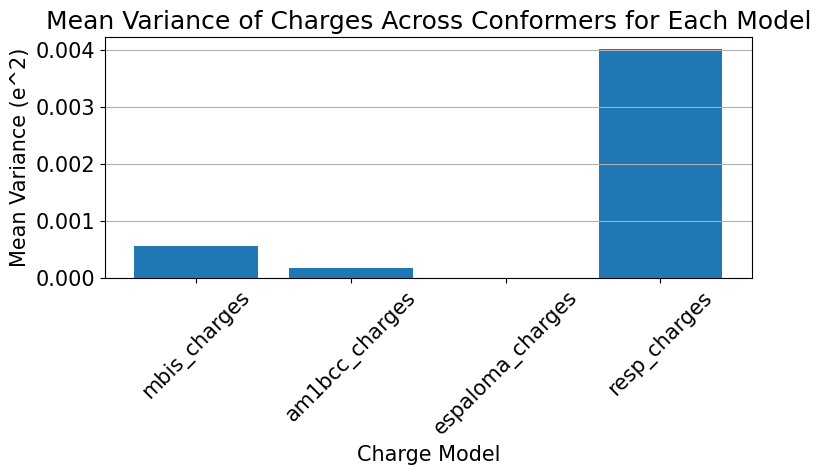

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Group data by smiles
grouped = df.groupby("smiles")

# Charge models to analyze
charge_models = ["mbis_charges", "am1bcc_charges", "espaloma_charges", "resp_charges"]

# Calculate variance of charges
charge_variances = {model: [] for model in charge_models}

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())
        # Compute variance for each atom index
        variances = np.var(charges, axis=0)
        # Store the mean variance across all atom indices for this smiles
        charge_variances[model].append(np.mean(variances))

# Aggregate variance data
aggregated_variances = {model: np.mean(variances) for model, variances in charge_variances.items()}

# Plot variance across charge models
plt.figure(figsize=(8, 5))
plt.bar(aggregated_variances.keys(), aggregated_variances.values())
plt.title("Mean Variance of Charges Across Conformers for Each Model")
plt.xlabel("Charge Model")
plt.ylabel("Mean Variance (e^2)")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


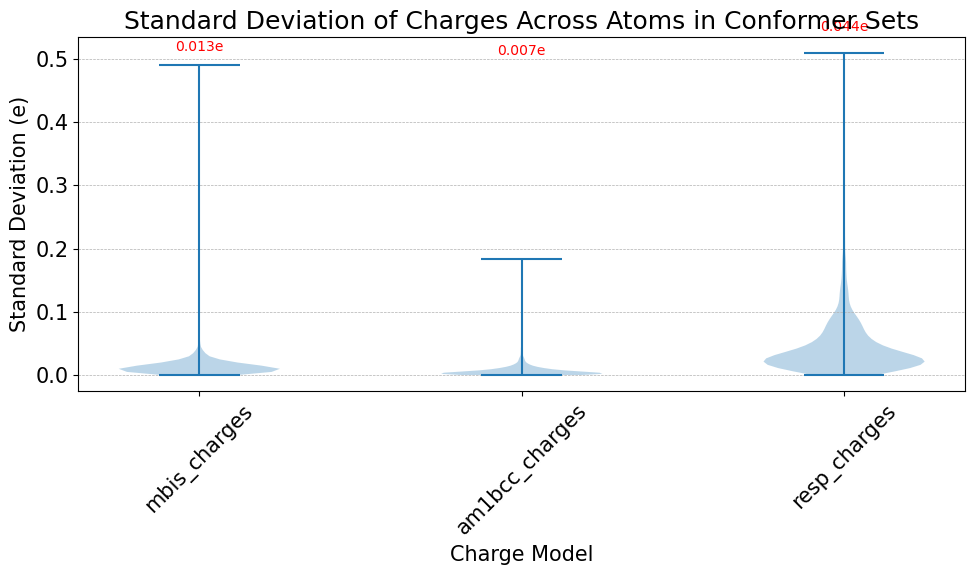

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Group data by smiles
grouped = df.groupby("smiles")

# Charge models to analyze
charge_models = ["mbis_charges", "am1bcc_charges", "resp_charges"]

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}
mean_std_deviation = {}  # To store mean standard deviations for annotation

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the violin plot
        std_deviation_data[model].extend(std_deviation)

# Calculate mean standard deviation for each charge model
mean_std_deviation = {model: np.mean(std_deviation_data[model]) for model in charge_models}

# Prepare data for the violin plot
violin_data = [std_deviation_data[model] for model in charge_models]

# Plotting the violin plot
plt.figure(figsize=(10, 6))
parts = plt.violinplot(violin_data, showmeans=False)

# Add mean standard deviation values above each violin
for i, model in enumerate(charge_models, start=1):
    mean_value = mean_std_deviation[model]
    plt.text(i, mean_value + 0.50, f"{mean_value:.3f}e", ha="center", color="red", fontsize=10)

# Add labels and grid
plt.xticks(range(1, len(charge_models) + 1), charge_models, rotation=45)
plt.title("Standard Deviation of Charges Across Atoms in Conformer Sets")
plt.xlabel("Charge Model")
plt.ylabel("Standard Deviation (e)")
plt.grid(axis="y", linestyle='--', linewidth=0.5)  # Remove vertical grid lines
plt.tight_layout()
plt.show()


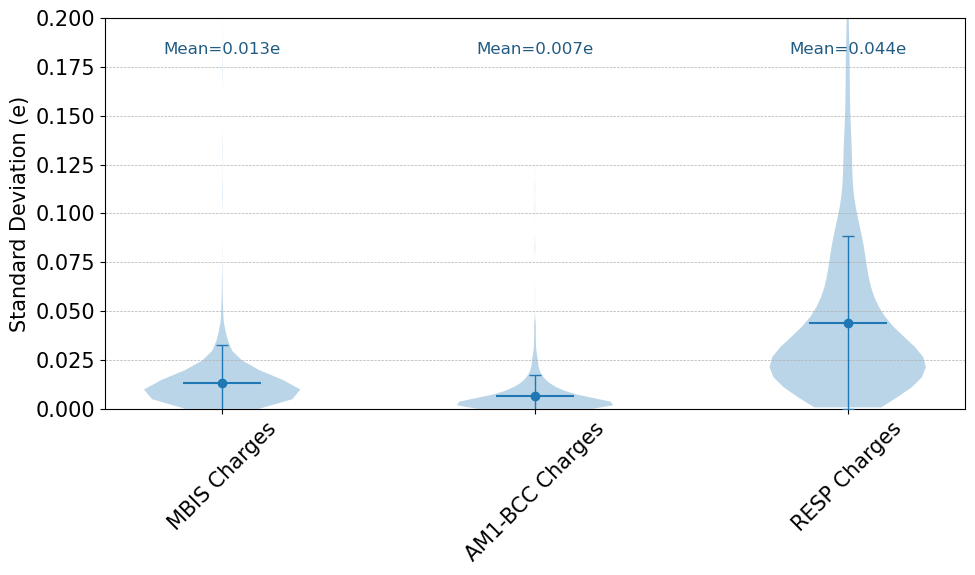

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 15          # Base font size
mpl.rcParams['axes.labelsize'] = 15     # Axis label font size
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] =15
mpl.rcParams['ytick.labelsize'] = 15

# Collect standard deviations across atoms for each charge model
std_deviation_data = {model: [] for model in charge_models}

for smiles, group in grouped:
    for model in charge_models:
        # Stack charges across conformers for the current model
        charges = np.vstack(group[model].to_list())  # Shape: (num_conformers, num_atoms)
        # Compute standard deviation for each atom across conformers
        std_deviation = np.std(charges, axis=0)  # Shape: (num_atoms,)
        # Add to the dataset for the box plot
        std_deviation_data[model].extend(std_deviation)

plt.figure(figsize=(10, 6))

# Draw the violin plot with means displayed
parts = plt.violinplot(
    violin_data,
    showmeans=True,  # show the green mean lines inside violins
    showextrema=False,
    showmedians=False
)


# Mark means and std deviations with error bars
for i, model in enumerate(charge_models, start=1):
    mean_val = mean_std_deviation[model]
    std_val = np.array(std_deviation_data[model]).std()
    
    # Use errorbar to create vertical lines with top/bottom caps (±1 std)
    plt.errorbar(
        i,                  # x-position
        mean_val,           # y-position (the mean)
        yerr=std_val,       # the error margin for top/bottom
        fmt='o',            # marker style
        color="#1f77b4",    # color for the marker
        ecolor="#1f77b4",   # color for the error bars
        elinewidth=1,       # thickness of the error bar lines
        capsize=4,          # length of the top/bottom caps
        capthick=1,         # thickness of the cap lines
        zorder=3
    )
    
    # Optionally add text to label the mean above the error bar
    plt.text(
        i,
        0.18,          # small offset above the mean point
        f"Mean={mean_val:.3f}e",
        ha="center",
        va="bottom",
        color="#225b82",           # text color
        fontsize=12,
        zorder=4
    )

# Optionally limit the y-axis for better visibility
plt.ylim(0, 0.20)

# Add labels and grid
plt.xticks(range(1, len(charge_models) + 1),labels=['MBIS Charges','AM1-BCC Charges','RESP Charges'], rotation=45)
plt.ylabel("Standard Deviation (e)")
plt.grid(axis="y", linestyle='--', linewidth=0.5)
plt.savefig("ConformerVoilinTest.png",dpi=400, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [27]:
charge_models = ["am1bcc_esp", "resp_esp", "mbis_esp"]

compare_with = "qm_esp"




/Users/localadmin/miniforge3/envs/charge_model_env/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


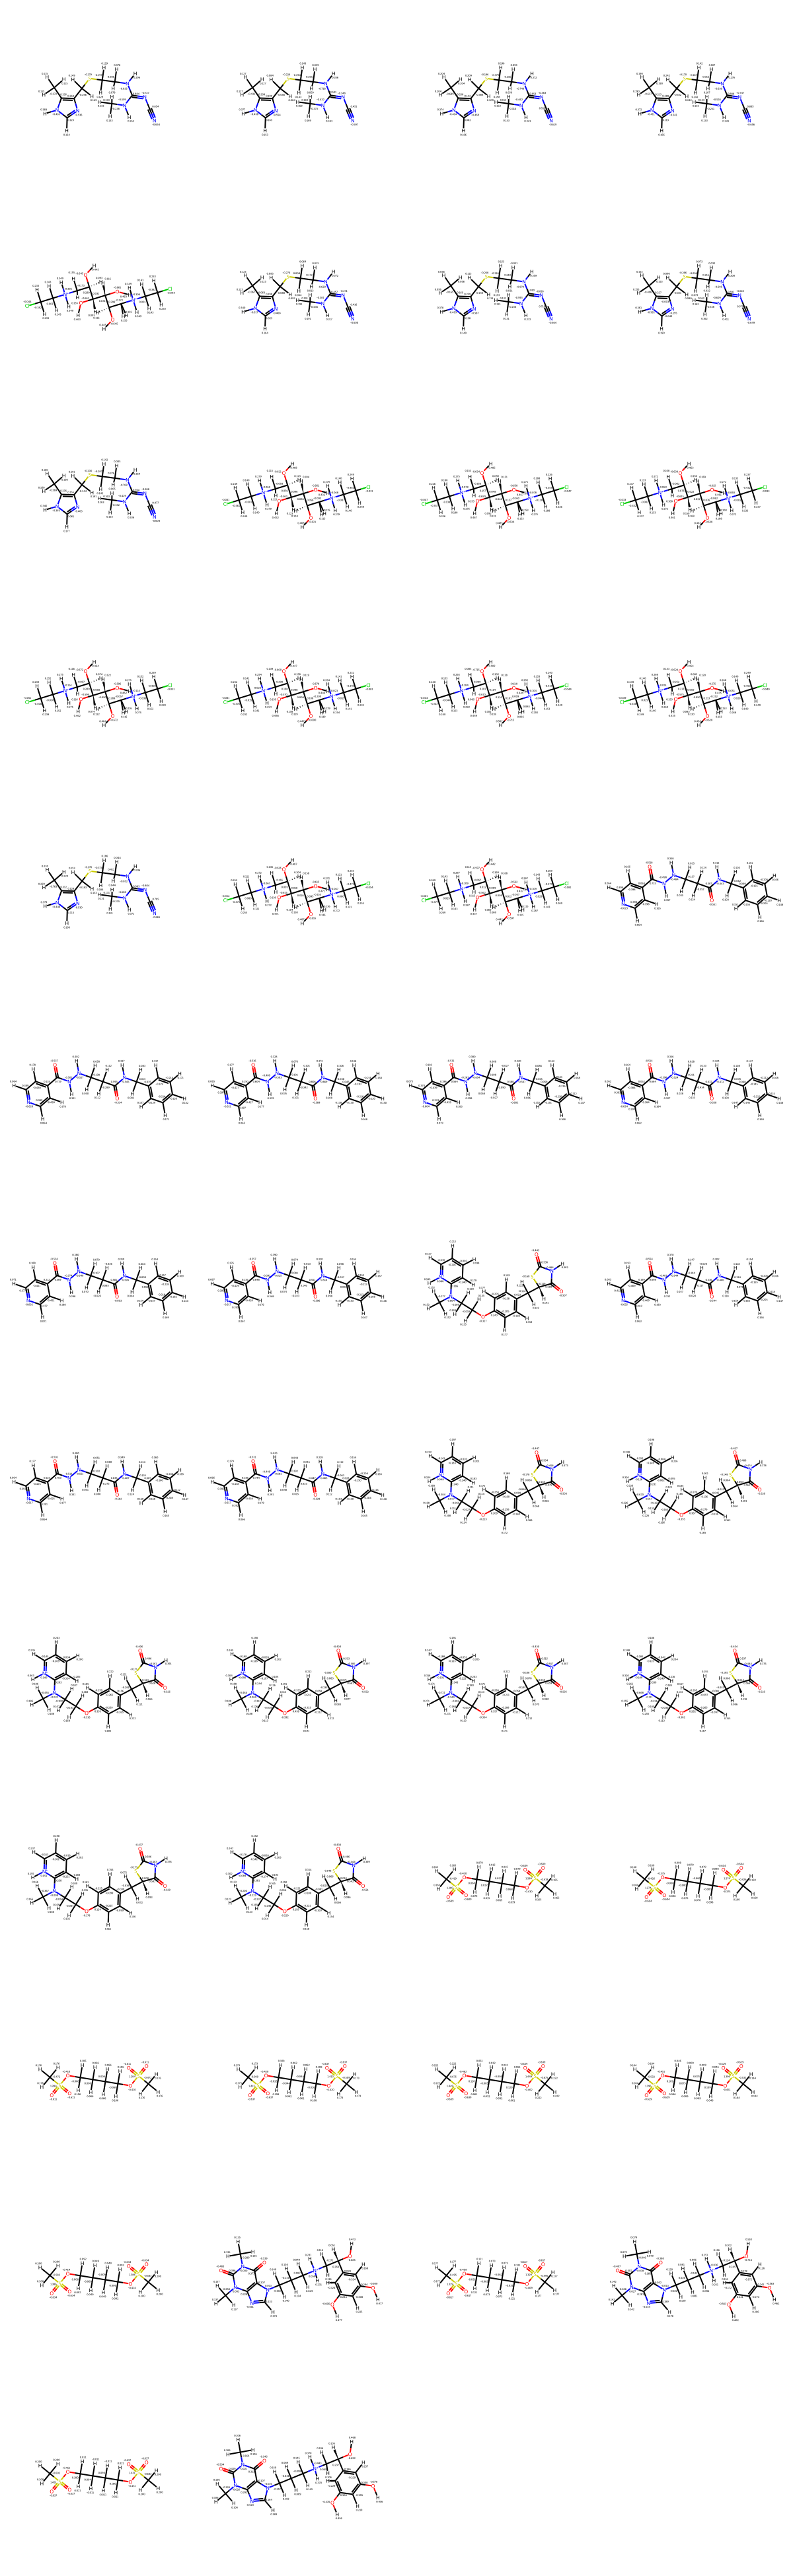

In [28]:
draw_mols  = list(range(1,80))
images = []
for mol in draw_mols:
    openff_molecule = Molecule.from_mapped_smiles(df.iloc[mol]['molecule'], allow_undefined_stereo=True)
    rdkit_mol = openff_molecule.to_rdkit()
    resp_charges =  df.iloc[mol]['resp_charges']
    for i, atom in enumerate(rdkit_mol.GetAtoms()):
        lbl = '%.3f' % (resp_charges[i])
        atom.SetProp('atomNote', lbl)
    images.append(rdkit_mol)

img = Draw.MolsToGridImage(images, molsPerRow=4, subImgSize=(300, 300))
img

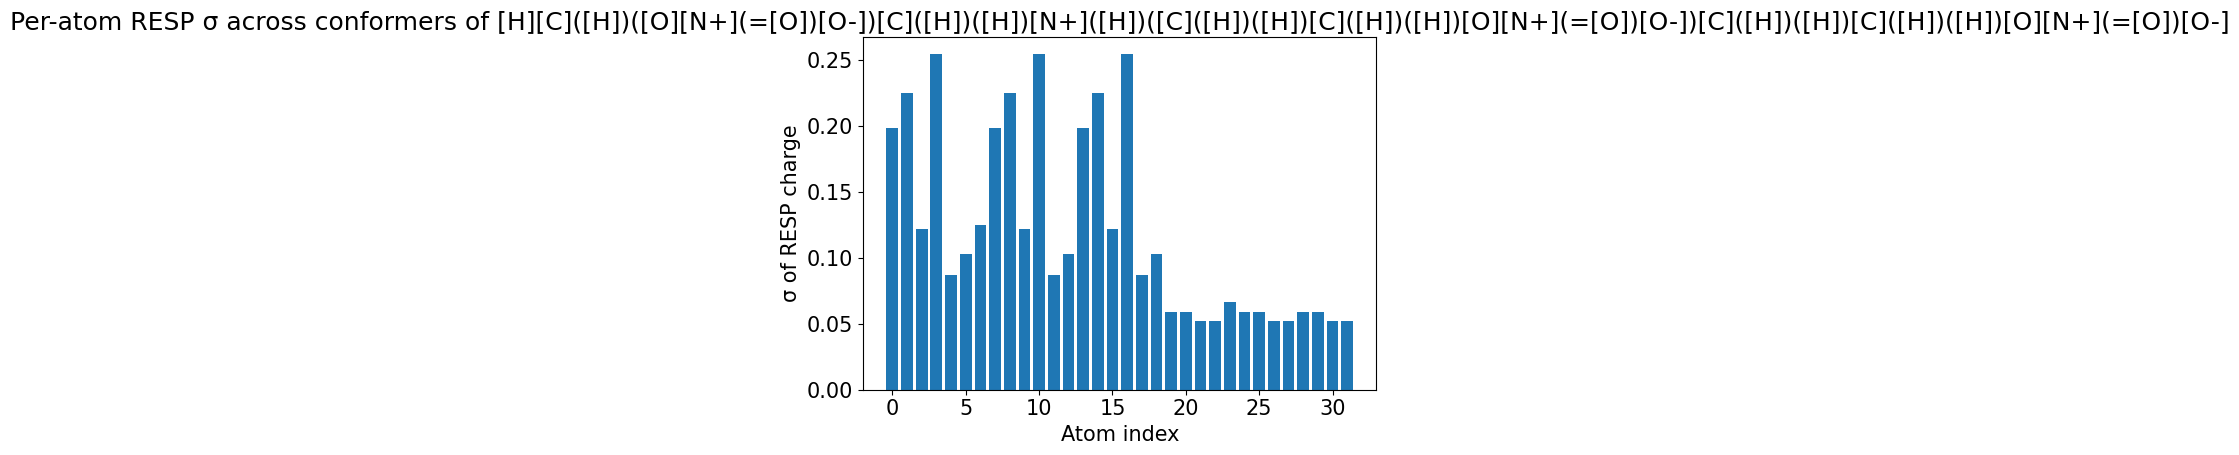

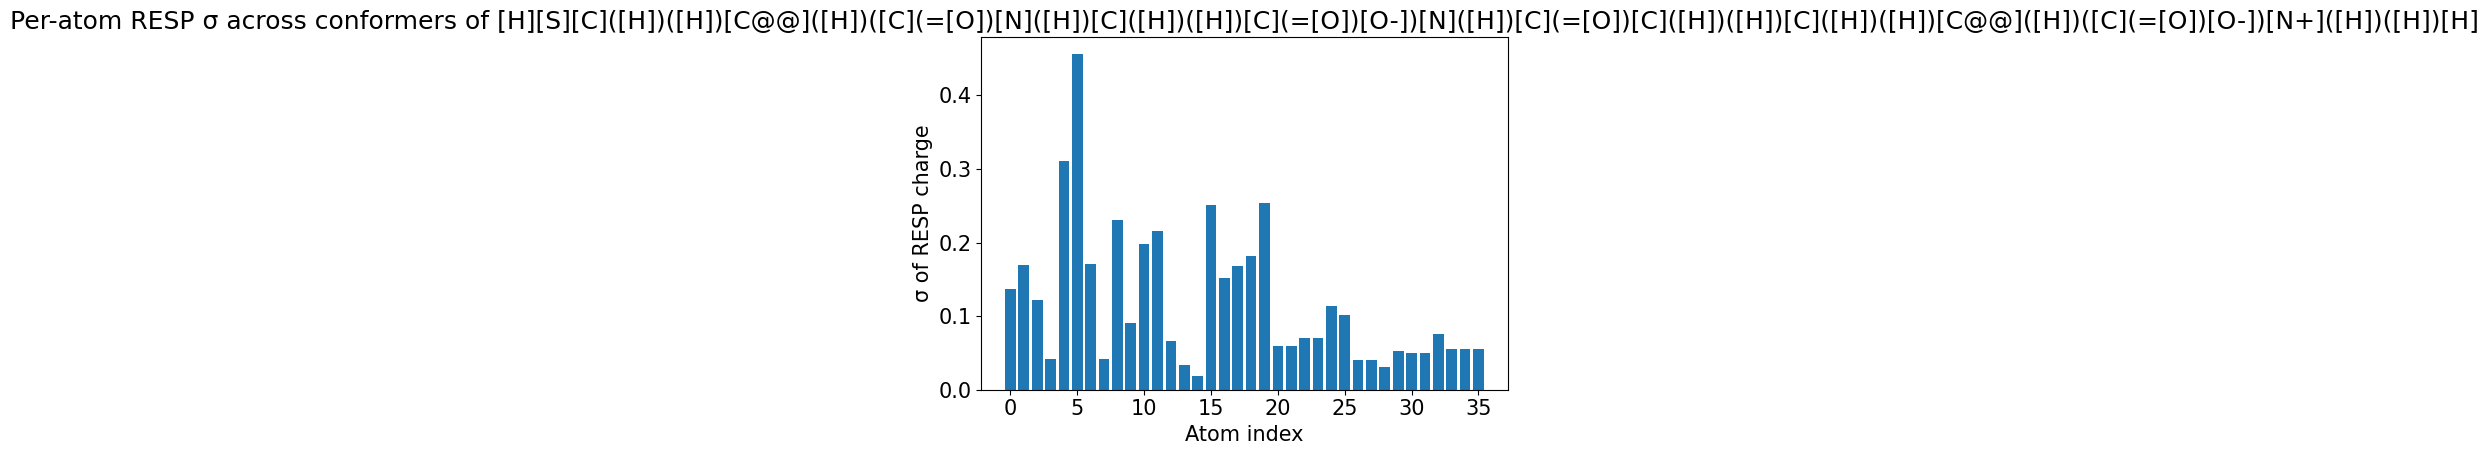

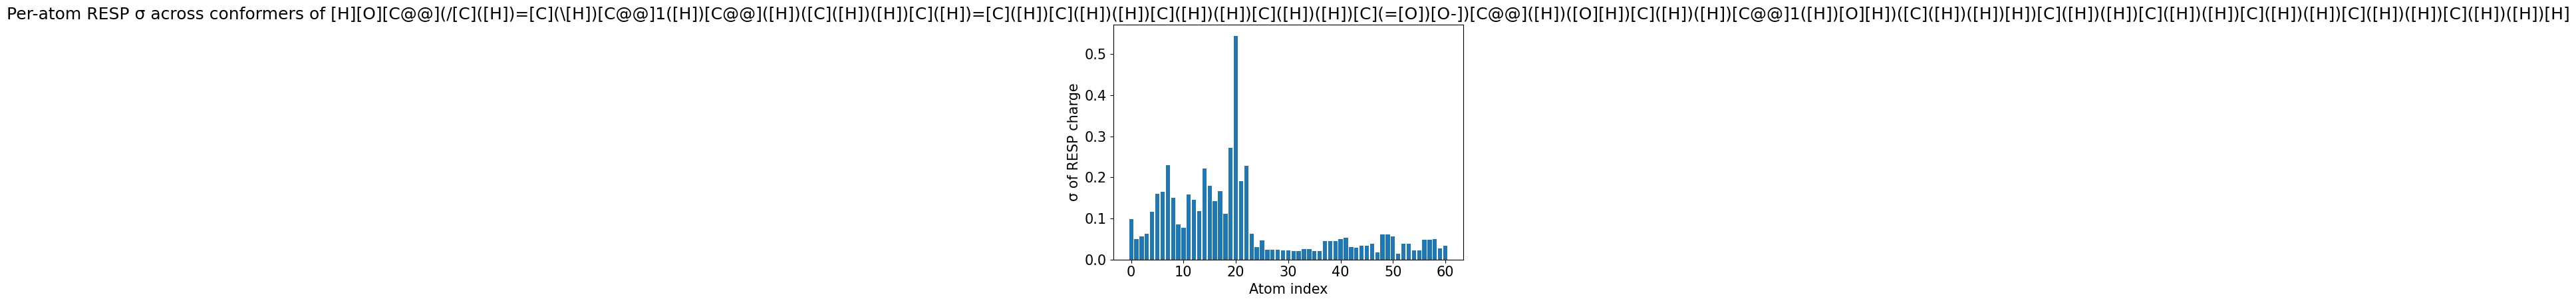

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import re

# -----------------------------------------------------------------------------
# 0. Assume df['resp_charges'] is still a list of floats per conformer.
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# 1. Compute, for each molecule, the *per-atom* stddev across its conformers,
#    then collapse that array into one scalar (here: the mean atomic σ).
# -----------------------------------------------------------------------------
def mean_per_atom_std(charge_lists):
    """
    charge_lists: an iterable of equal-length lists/arrays of atomic charges
    returns: mean of the per-atom stddev across conformers
    """
    mat = np.vstack(charge_lists)         # shape: (n_conformers, n_atoms)
    atom_std = mat.std(axis=0, ddof=1)    # per-atom σ
    return atom_std.mean()                # or atom_std.max() if you prefer

variation = (
    df.groupby('smiles')['resp_charges']
      .agg(lambda lists: mean_per_atom_std(lists))
      .reset_index(name='mean_atom_std')
)

# pick top 3 by that metric
top3 = variation.nlargest(3, 'mean_atom_std')
top3_smiles = top3['smiles'].tolist()

# -----------------------------------------------------------------------------
# 2. Extract those conformers for plotting/export
# -----------------------------------------------------------------------------
top3_df = df[df['smiles'].isin(top3_smiles)].copy()

# -----------------------------------------------------------------------------
# 3. (Optional) Plot per-atom σ for each of the top-3 molecules
# -----------------------------------------------------------------------------
# If you want to *see* which atoms are most labile, you could:
for smi in top3_smiles:
    lists = top3_df[top3_df['smiles']==smi]['resp_charges'].tolist()
    mat   = np.vstack(lists)           # (n_conf, n_atoms)
    atom_std = mat.std(axis=0, ddof=1) # per-atom σ
    plt.figure()
    plt.bar(range(len(atom_std)), atom_std)
    plt.title(f'Per-atom RESP σ across conformers of {smi}')
    plt.xlabel('Atom index')
    plt.ylabel('σ of RESP charge')
    plt.tight_layout()
    plt.show()



Wrote combined.sdf


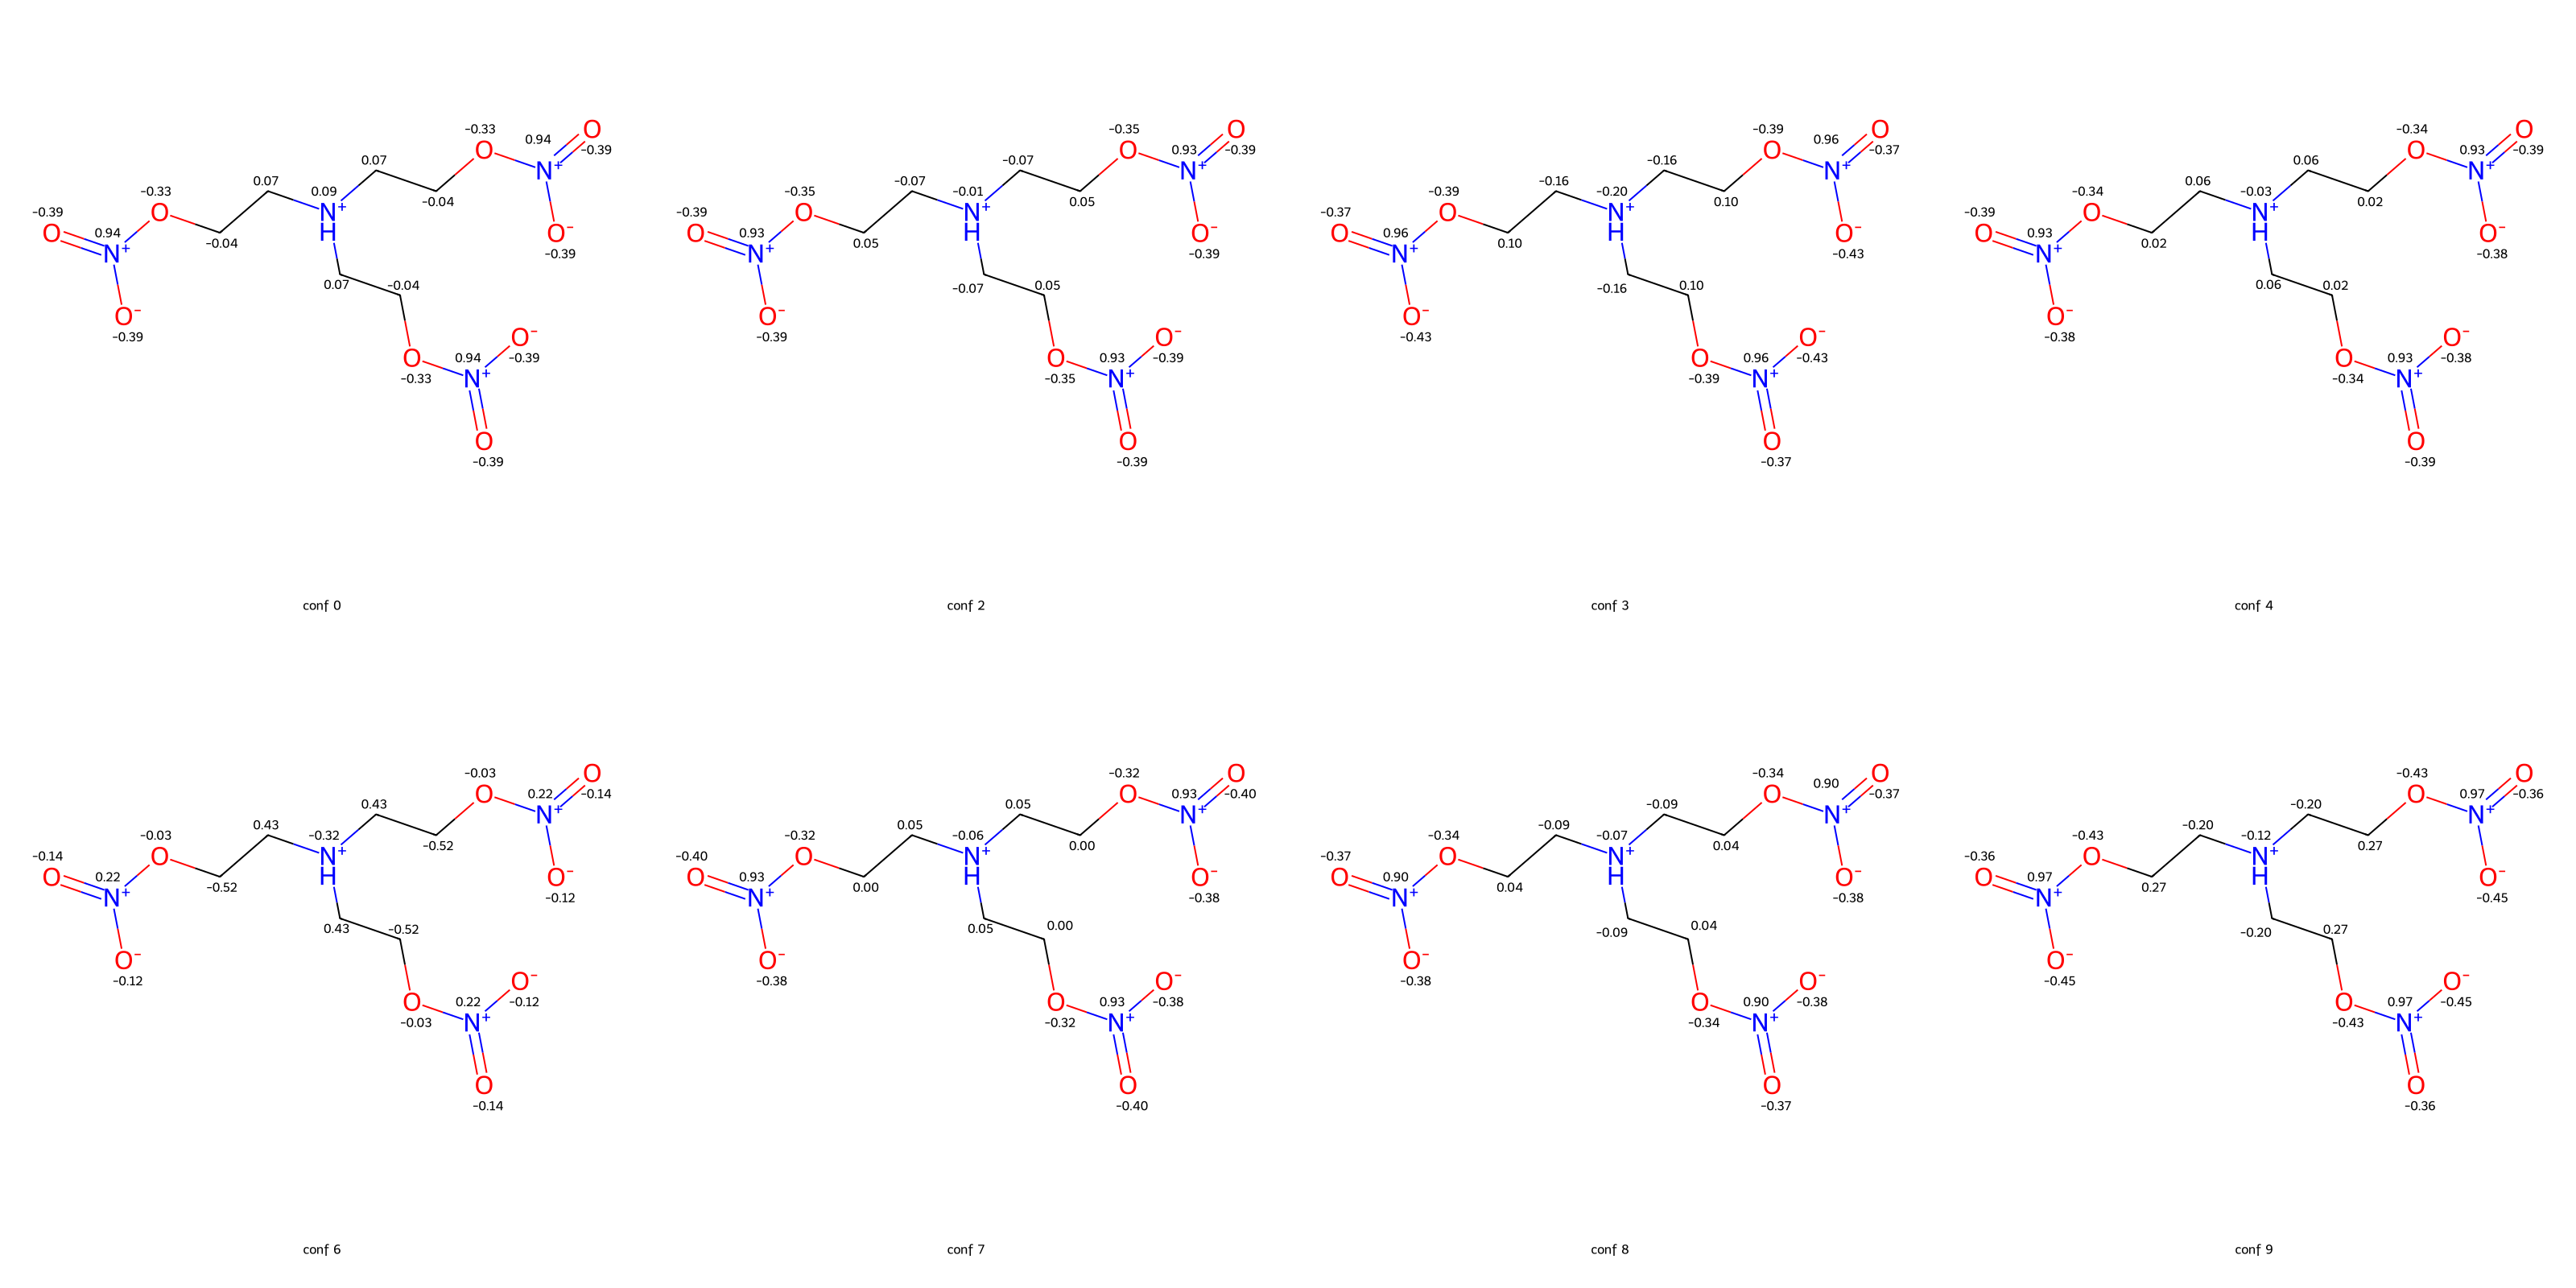

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdmolfiles
from rdkit.Geometry import Point3D

separate_sdf = False    

def mean_atom_std(lists_of_charges):
    mat = np.vstack(lists_of_charges)
    return mat.std(axis=0, ddof=1).mean()

variation = (
    df.groupby('smiles')['resp_charges']
      .agg(lambda L: mean_atom_std(L))
      .reset_index(name='mean_atom_std')
)
top_smiles = variation.nlargest(50, 'mean_atom_std')['smiles'].iloc[0]

subdf = (
    df[df['smiles'] == top_smiles]
    .sort_values('conformer_no')
    .reset_index(drop=True)
)
n_confs = subdf.shape[0]

if not separate_sdf:
    combined_writer = rdmolfiles.SDWriter("combined.sdf")

mols_for_drawing = []
for row in subdf.itertuples(index=False):
    mol = Chem.MolFromSmiles(row.molecule)
    mol.RemoveAllConformers()
    flat = np.array(row.geometry, dtype=float)
    coords = flat.reshape(-1, 3)
    conf = Chem.Conformer(mol.GetNumAtoms())
    for atom in mol.GetAtoms():
        m = atom.GetAtomMapNum()
        if not (1 <= m <= coords.shape[0]):
            raise ValueError(f"AtomMapNum {m} out of range (n_atoms={coords.shape[0]})")
        x, y, z = coords[m-1]
        conf.SetAtomPosition(atom.GetIdx(), Point3D(x, y, z))
    mol.AddConformer(conf, assignId=True)

    for atom in mol.GetAtoms():
        m = atom.GetAtomMapNum()
        atom.SetAtomMapNum(0)  # clear map so it won’t render
        if 1 <= m <= len(row.resp_charges):
            chg = row.resp_charges[m-1]
            atom.SetProp("RESP_CHG", f"{chg:.6f}")
            atom.SetProp("atomNote", f"{chg:.2f}")
        else:
            atom.SetProp("atomNote", "")

    if separate_sdf:
        fname = f"{top_smiles}_conf{row.conformer_no}.sdf"
        w = rdmolfiles.SDWriter(fname)
        w.write(mol)
        w.close()
        print(f"Wrote {fname}")
    else:
        combined_writer.write(mol)

    # e) prepare 2D‐flattened copy for grid drawing
    mol2d = Chem.Mol(mol)               # deep copy, keeps atomNote props
    AllChem.Compute2DCoords(mol2d)
    mols_for_drawing.append(mol2d)

# 5. finalize SDF writer
if not separate_sdf:
    combined_writer.close()
    print("Wrote combined.sdf")

# 6. display grid of all conformers
img = Draw.MolsToGridImage(
    mols_for_drawing,
    molsPerRow=min(n_confs, 4),
    subImgSize=(800,800),
    useSVG=False,
    legends=[f"conf {r.conformer_no}" for r in subdf.itertuples(index=False)]
)
img


In [31]:
subdf

,mbis_charges,am1bcc_charges,espaloma_charges,riniker_monopoles,resp_charges,qm_dipoles,mbis_dipoles,am1bcc_dipole,espaloma_dipole,riniker_dipoles,...,mbis_esp,riniker_esp_rms,riniker_esp,qm_esp,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.10722778039668202, 0.041962557901032066, -...","[0.06279996875000002, 0.11473296875000003, -0....","[0.08158408594317734, 0.18139156443066895, -0....",None,"[0.0733, -0.0392, -0.3291, 0.9425, -0.3883, -0...",1.651115,1.818819,1.222121,1.042737,NaN,...,"[0.05439827390615616, 0.05367426293256442, 0.0...",NaN,NaN,"[0.055578249609054, 0.05546285947324492, 0.057...",[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.717514421272201, -4.242640686788549, -0.2...","[0.220854662951723, 1.3404666431462458, -0.620...",0,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1125.807590
1,"[-0.12208708187195422, 0.03915614495037314, -0...","[0.06846703125, 0.10273303125000002, -0.375332...","[0.08158408594317734, 0.18139156443066895, -0....",None,"[-0.0741, 0.049, -0.3452, 0.9323, -0.3908, -0....",2.777308,2.924158,1.878216,2.269716,NaN,...,"[0.05470714200702597, 0.05337283367042802, 0.0...",NaN,NaN,"[0.0567287334022879, 0.05545566596858187, 0.05...",[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-7.071067812030843, -2.82842712474619, 0.707...","[1.3869839276737954, -0.985736583157418, -0.86...",2,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1125.811332
2,"[-0.1265382135490684, 0.04251715318164781, -0....","[0.0697999375, 0.1093999375, -0.3506670625, 0....","[0.08158408594317734, 0.18139156443066895, -0....",None,"[-0.1572, 0.1011, -0.3861, 0.9565, -0.3653, -0...",2.115268,2.232597,2.119655,1.970019,NaN,...,"[0.06671293538097325, 0.06307846531717605, 0.0...",NaN,NaN,"[0.0674136186106935, 0.06395312313772017, 0.06...",[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.363961030844296, 3.889087296526011, -0.44...","[-0.2138980073457847, -0.9000454537580292, 0.5...",3,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1125.809874
3,"[-0.11308768014482157, 0.03488721927855155, -0...","[0.0730705, 0.10600449999999999, -0.4030625000...","[0.08158408594317734, 0.18139156443066895, -0....",None,"[0.0561, 0.0228, -0.3397, 0.9297, -0.3934, -0....",1.713675,1.813767,1.404679,1.435100,NaN,...,"[0.06403827610547519, 0.0666460278300834, 0.06...",NaN,NaN,"[0.0652932514139426, 0.0683468148892672, 0.064...",[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.7175144219336715, -3.5355339059327373, -1...","[1.3000134364695324, -0.41135515456196126, 0.7...",4,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1125.812035
4,"[-0.12479205192813239, 0.049186571667737995, -...","[0.06586265625000001, 0.11179565625000001, -0....","[0.08158408594317734, 0.18139156443066895, -0....",None,"[0.4332, -0.5157, -0.0273, 0.2209, -0.1378, -0...",3.791910,4.014428,3.621571,4.395973,NaN,...,"[0.06153144701672652, 0.05780991054816071, 0.0...",NaN,NaN,"[0.0625169146908231, 0.05849383649588269, 0.06...",[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-6.010407640085654, -3.889087297022115, 0.70...","[1.1952689470227214, 0.9909815493599126, -1.25...",6,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1125.701408
5,"[-0.11849243739586583, 0.046381329584468334, -...","[0.07680003124999998, 0.10506703124999998, -0....","[0.08158408594317734, 0.18139156443066895, -0....",None,"[0.0453, 0.0046, -0.3247, 0.9302, -0.3959, -0....",1.749311,1.767969,2.574411,2.475001,NaN,...,"[0.055591241350738764, 0.05327278144935924, 0....",NaN,NaN,"[0.05507913722664526, 0.05341607210909061, 0.0...",[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])...,"[[-7.0710678117001065, -4.242640687284653, 2.1...","[-1.0216471407229832, 1.0459260463237605, -0.6...",7,[H][C]([H])([O][N+](=[O])[O-])[C]([H])([H])[N+...,-1125.818214
6,"[-0.10538363949539017, 0.03383754115138508, -0...","[0.0977688125, 0.1073688125, -0.42536418750000...","[0.08158408594317734, 0.18139156443066895, -0....",None,"[-0.0881, 0.0378, -0.3381, 0.9014, -0.3734, -0...",

In [32]:
subdf['molecule'].iloc[0]

'[C:1]([C:2]([O:3][N+:4](=[O:5])[O-:6])([H:22])[H:23])([N+:7]([C:8]([C:9]([O:10][N+:11](=[O:12])[O-:13])([H:27])[H:28])([H:25])[H:26])([C:14]([C:15]([O:16][N+:17](=[O:18])[O-:19])([H:31])[H:32])([H:29])[H:30])[H:24])([H:20])[H:21]'